In [1]:
# Exercise 3: Decision Boundary

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [4]:
# 1 Dimension

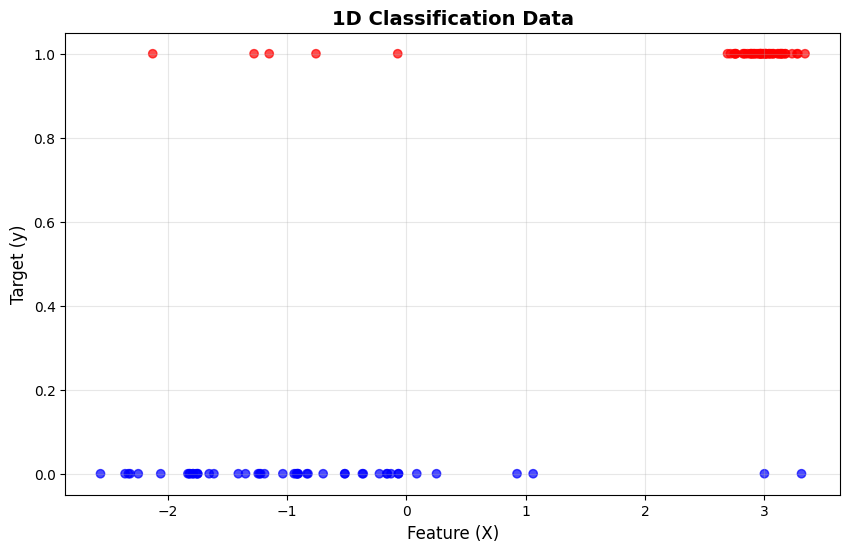

In [43]:
# Generate 1D data
X, y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5, 0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

# 1. Plot the data
# Reshape X
X_flat = X.reshape(-1)

# Plot original data
plt.figure(figsize=(10, 6))
plt.scatter(X_flat, y, alpha=0.7, c=y, cmap='bwr')
plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.title('1D Classification Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()


In [44]:
# Fit Logistic regression
model_1d = LogisticRegression()
model_1d.fit(X, y)

print("Coefficient:", model_1d.coef_)
print("Intercept:", model_1d.intercept_)

Coefficient: [[1.18885765]]
Intercept: [-0.98497516]


In [32]:
# 3. Plot with fitted sigmoid

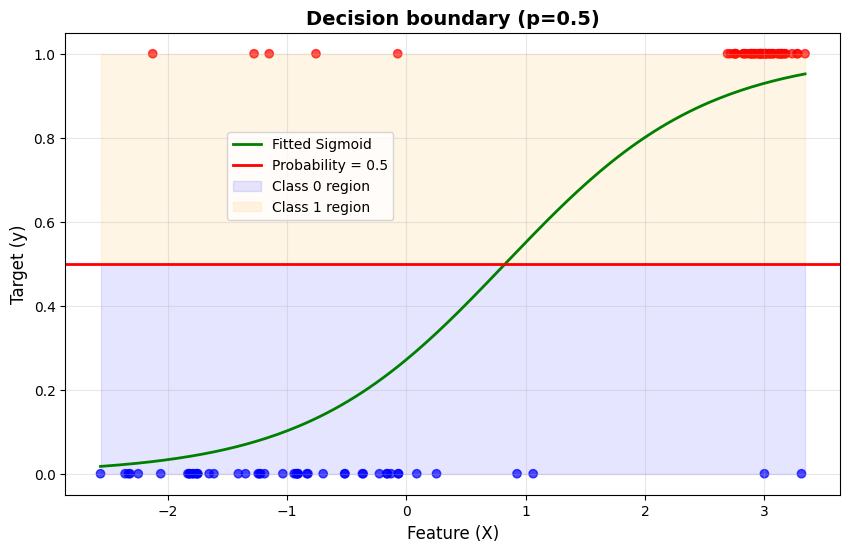

In [62]:
# generate smooth curve
x_values = np.linspace(X_flat.min(), X_flat.max(), 200).reshape(-1, 1)

# predicted probabilities
y_probs = model_1d.predict_proba(x_values)[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(X_flat, y, alpha=0.7, c=y, cmap='bwr')
plt.plot(x_values, y_probs, '-g', label="Fitted Sigmoid", linewidth=2)

# Add 0.5 probability line
plt.axhline(y=0.5, color='red', linewidth=2, label='Probability = 0.5')


# Shade regions
plt.fill_between(x_values.ravel(), 0, 0.5, color="blue", alpha=0.1, label="Class 0 region")
plt.fill_between(x_values.ravel(), 0.5, 1, color="orange", alpha=0.1, label="Class 1 region")


plt.xlabel('Feature (X)', fontsize=12)
plt.ylabel('Target (y)', fontsize=12)
plt.title("Decision boundary (p=0.5)", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc="upper left", bbox_to_anchor=(0.2, 0.8))
# plt.legend(loc="best", framealpha=0.5)  # 50% transparent box
plt.show()

In [64]:
# 4. Custom prediction functions

In [71]:
def predict_probability(coefs, X):
    """
    coefs is a list that contains a and b: [coef, intercept]
    X is the features set
    Returns probability of X
    """
    coef, intercept = coefs
    z = coef * X + intercept
    probabilities = 1 / (1 + np.exp(-z))
    return probabilities

    # Check
custom_probs = predict_probability([model_1d.coef_[0][0], model_1d.intercept_[0]], x_values)
print("Custom vs scikit-learn (first 5):")
print(custom_probs[:5], y_probs[:5])

Custom vs scikit-learn (first 5):
[[0.01742228]
 [0.01803642]
 [0.01867179]
 [0.0193291 ]
 [0.02000908]] [0.01742228 0.01803642 0.01867179 0.0193291  0.02000908]


In [80]:
# 5. Custom class prediction
def predict_class(coefs, X, threshold=0.5):
    probabilities = predict_probability(coefs, X)
    return (probabilities >= threshold).astype(int)

# Check
custom_classes = predict_class([model_1d.coef_[0], model_1d.intercept_[0]], x_values)
print("Custom vs scikit-learn (first 20):")
print(custom_classes[:20])
print(model_1d.predict(x_values)[:20])

Custom vs scikit-learn (first 20):
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [75]:
# 2 DIMENSIONAL

In [82]:
# Generate 2D dataset
X_2d, y_2d = make_classification(
    n_features=2,
    n_redundant=0,
    n_samples=250,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.05,
    class_sep=3,
    random_state=43
)

# Fit logistic regression
model_2d = LogisticRegression()
model_2d.fit(X_2d, y_2d)

# Create mesh grid for decision boundary
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_2d.predict_proba(grid)[:, 1].reshape(xx.shape)

# Create mesh grid for decision boundary
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_2d.predict_proba(grid)[:, 1].reshape(xx.shape)

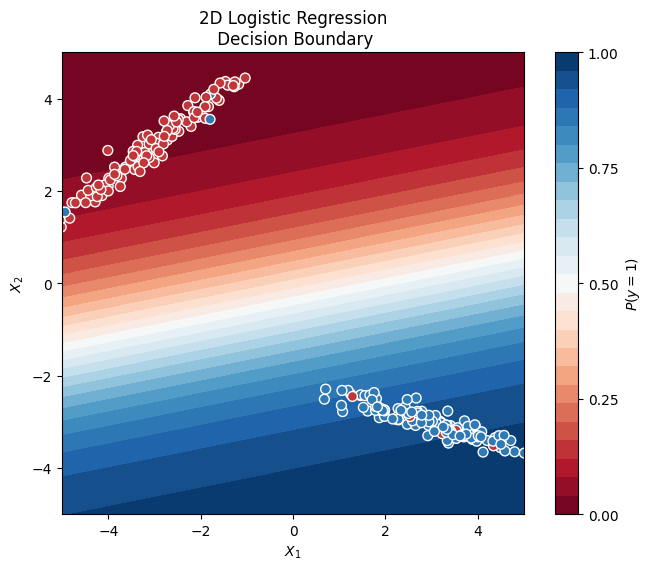

In [85]:
# Plot decision boundary
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")
plt.title("2D Logistic Regression\n Decision Boundary")
plt.show()